In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

In [2]:
from torchvision.transforms import v2

In [3]:
transforms = transforms.Compose([
                                 transforms.ToTensor()
])

In [4]:
train = datasets.MNIST("", train=True, transform=transforms, download=True)
train, valid = random_split(train, [50000, 10000])

In [5]:
trainloader = DataLoader(dataset=train, batch_size=128)
validloader = DataLoader(dataset=valid, batch_size=128)

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the images
        x = F.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.leaky_relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

model = Network()

if torch.cuda.is_available():
    model = model.cuda()

model

Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.1)

# LR step

In [8]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer,
                                              step_size=3, gamma=0.1)


In [9]:
from tqdm import tqdm
epochs = 10

lr_rate_list = []
for e in range(epochs):
    train_loss = 0.0
    for data, labels in tqdm(trainloader):
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
    
    scheduler.step()
    lr_rate = scheduler.get_last_lr()
    lr_rate_list.append(lr_rate)
    print(f"learning rate: {lr_rate}")
    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(trainloader)}')

    valid_loss = 0.0
    total_correct = 0
    total_samples = 0
    model.eval()
    for data, labels in tqdm(validloader):
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        target = model(data)

        loss = criterion(target, labels)
        valid_loss += loss.item()

        _, predicted = torch.max(target, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    
    accuracy = 100 * total_correct / total_samples

    print(f'Epoch {e+1} \t\t Valid Loss: {valid_loss / len(validloader)}')
    print(f'Epoch {e+1} \t\t Valid accuracy: {accuracy:.2f}%')


100%|██████████| 391/391 [00:10<00:00, 38.02it/s]


learning rate: [0.1]
Epoch 1 		 Training Loss: 0.6908942245309005


100%|██████████| 79/79 [00:01<00:00, 60.77it/s]


Epoch 1 		 Valid Loss: 0.2617946465181399
Epoch 1 		 Valid accuracy: 91.92%


100%|██████████| 391/391 [00:10<00:00, 37.03it/s]


learning rate: [0.1]
Epoch 2 		 Training Loss: 0.19070210896642006


100%|██████████| 79/79 [00:01<00:00, 61.80it/s]


Epoch 2 		 Valid Loss: 0.218343476517291
Epoch 2 		 Valid accuracy: 93.65%


100%|██████████| 391/391 [00:10<00:00, 39.06it/s]


learning rate: [0.010000000000000002]
Epoch 3 		 Training Loss: 0.15084790748060511


100%|██████████| 79/79 [00:01<00:00, 55.35it/s]


Epoch 3 		 Valid Loss: 0.20869227385596384
Epoch 3 		 Valid accuracy: 94.28%


100%|██████████| 391/391 [00:16<00:00, 23.90it/s]


learning rate: [0.010000000000000002]
Epoch 4 		 Training Loss: 0.06831769153590092


100%|██████████| 79/79 [00:01<00:00, 40.14it/s]


Epoch 4 		 Valid Loss: 0.08040179781427112
Epoch 4 		 Valid accuracy: 97.60%


100%|██████████| 391/391 [00:13<00:00, 29.33it/s]


learning rate: [0.010000000000000002]
Epoch 5 		 Training Loss: 0.044833594349586905


100%|██████████| 79/79 [00:01<00:00, 55.14it/s]


Epoch 5 		 Valid Loss: 0.07746021171937449
Epoch 5 		 Valid accuracy: 97.82%


100%|██████████| 391/391 [00:11<00:00, 33.15it/s]


learning rate: [0.0010000000000000002]
Epoch 6 		 Training Loss: 0.034015875421655


100%|██████████| 79/79 [00:01<00:00, 51.24it/s]


Epoch 6 		 Valid Loss: 0.0779185314880849
Epoch 6 		 Valid accuracy: 97.84%


100%|██████████| 391/391 [00:09<00:00, 39.32it/s]


learning rate: [0.0010000000000000002]
Epoch 7 		 Training Loss: 0.023003014414618862


100%|██████████| 79/79 [00:01<00:00, 50.50it/s]


Epoch 7 		 Valid Loss: 0.06904158514004814
Epoch 7 		 Valid accuracy: 98.03%


100%|██████████| 391/391 [00:10<00:00, 35.99it/s]


learning rate: [0.0010000000000000002]
Epoch 8 		 Training Loss: 0.020374151981671525


100%|██████████| 79/79 [00:01<00:00, 42.70it/s]


Epoch 8 		 Valid Loss: 0.06970263559288711
Epoch 8 		 Valid accuracy: 98.03%


100%|██████████| 391/391 [00:12<00:00, 30.91it/s]


learning rate: [0.00010000000000000003]
Epoch 9 		 Training Loss: 0.01893401897066961


100%|██████████| 79/79 [00:01<00:00, 50.32it/s]


Epoch 9 		 Valid Loss: 0.07047942718432014
Epoch 9 		 Valid accuracy: 98.04%


100%|██████████| 391/391 [00:10<00:00, 38.17it/s]


learning rate: [0.00010000000000000003]
Epoch 10 		 Training Loss: 0.017157601920859245


100%|██████████| 79/79 [00:01<00:00, 61.42it/s]

Epoch 10 		 Valid Loss: 0.07046244022896207
Epoch 10 		 Valid accuracy: 98.04%


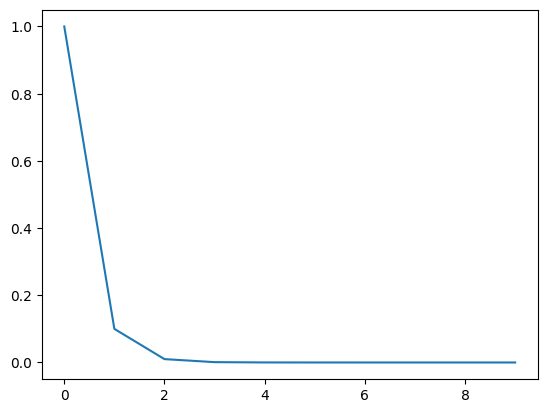

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lr_rate_list)
plt.show()